In [24]:
!pip install gensim nltk

In [25]:
# --- CELL 1: Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer # Changed from TfidfVectorizer based on later screenshots
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB



In [14]:
# --- CELL 2: Load Data ---
# Make sure 'resume.csv' is in your directory
resume_df = pd.read_csv('resume.csv', encoding='latin-1')
print("Initial Data Head:")
print(resume_df.head())


Initial Data Head:
  resume_id        class                                        resume_text
0  resume_1  not_flagged  \rCustomer Service Supervisor/Tier - Isabella ...
1  resume_2  not_flagged  \rEngineer / Scientist - IBM Microelectronics ...
2  resume_3  not_flagged  \rLTS Software Engineer Computational Lithogra...
3  resume_4  not_flagged   TUTOR\rWilliston VT - Email me on Indeed: ind...
4  resume_5      flagged  \rIndependent Consultant - Self-employed\rBurl...


In [15]:
# --- CELL 3: Initial Exploration and Conversion ---
print("\nNull Values:")
print(resume_df.isnull().sum())
print("\nClass Value Counts Before Conversion:")
print(resume_df['class'].value_counts()) # Shows 'not_flagged' and 'flagged'

# Convert 'class' column to numerical (0 and 1)
resume_df['class'] = resume_df['class'].apply(lambda x: 1 if x == 'flagged' else 0)
print("\nClass Value Counts After Conversion:")
print(resume_df['class'].value_counts())


Null Values:
resume_id      0
class          0
resume_text    0
dtype: int64

Class Value Counts Before Conversion:
class
not_flagged    92
flagged        33
Name: count, dtype: int64

Class Value Counts After Conversion:
class
0    92
1    33
Name: count, dtype: int64


In [16]:
# --- CELL 4: Stopwords Preparation ---
nltk.download("stopwords")
stop_words = stopwords.words('english')
# Extend stopwords with common non-content words found in text data
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'email', 'com'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
# --- CELL 5: Define Preprocessing Function ---
def preprocess(text):
    # Remove stop words and remove words with 2 or less characters
    result = []
    for token in gensim.utils.simple_preprocess(text) :
        # Check against both gensim default STOPWORDS and the extended custom list
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
    return ' '.join(result)

In [26]:
# --- CELL 6: Apply Preprocessing ---
resume_df['cleaned'] = resume_df['resume_text'].apply(preprocess)

# Display a sample of the cleaned text
print("Cleaned Text (Sample 0):\n", resume_df['cleaned'][0])
print("\nOriginal Text (Sample 0):\n", resume_df['resume_text'][0])

Cleaned Text (Sample 0):
 customer service supervisor tier isabella catalog company south burlington aecf work experience customer service supervisor tier isabella catalog company shelburne august present customer service visual set display website maintenance supervise customer service team popular catalog company manage day day issues resolution customer upset ensure customer satisfaction troubleshoot order shipping issues lost transit order errors damages manage resolve escalated customer calls ensure customer satisfaction assist customers order placing cross selling upselling catalog merchandise set display sample merchandise catalog library customer pick area facility website clean adding images type product information proofreading administrative assistant events coordinator office services assistant eileen fisher irvington february july support director architecture architecture coordinator daily activities including preparing monthly expense reports scheduling calendar maintena

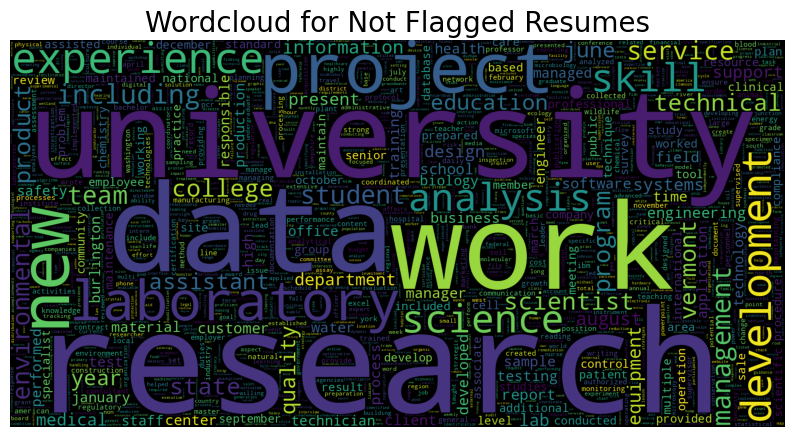

In [27]:
# --- CELL 7: Word Cloud for Class 0 (Not Flagged) ---
plt.figure(figsize=(10, 10))
subset = resume_df[resume_df['class'] == 0]
text = subset.cleaned.values

cloud_0 = WordCloud(
    stopwords=stop_words,
    background_color='black',
    collocations=False,
    max_words=2000,
    width=1600,
    height=800
).generate(" ".join(text))

plt.axis('off')
plt.title('Wordcloud for Not Flagged Resumes', fontsize=20)
plt.imshow(cloud_0)
plt.show()

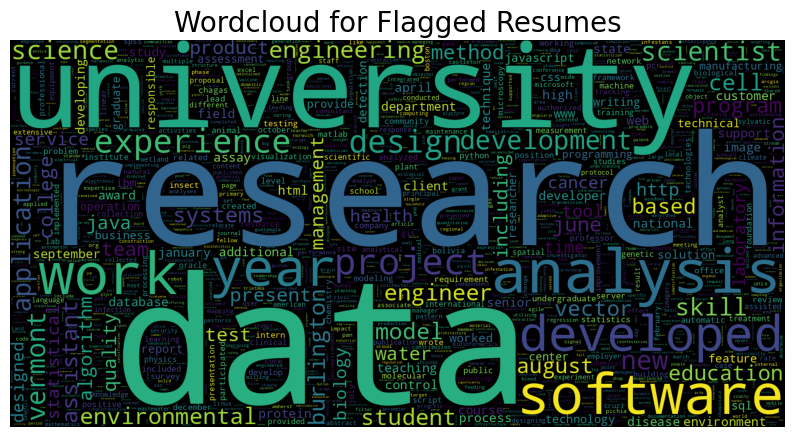

In [28]:
# --- CELL 8: Word Cloud for Class 1 (Flagged) ---
plt.figure(figsize=(10, 10))
subset = resume_df[resume_df['class'] == 1]
text = subset.cleaned.values

cloud_1 = WordCloud(
    stopwords=stop_words,
    background_color='black',
    collocations=False,
    max_words=2000,
    width=1600,
    height=800
).generate(" ".join(text))

plt.axis('off')
plt.title('Wordcloud for Flagged Resumes', fontsize=20)
plt.imshow(cloud_1)
plt.show()

In [29]:
# --- CELL 9: Vectorization (Count Vectorizer) ---
# CountVectorizer is used here, as indicated by the later screenshots.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(resume_df['cleaned'])
y = resume_df['class']

In [30]:
# --- CELL 10: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}")
print(f"Testing Samples: {X_test.shape[0]}")

Training Samples: 100
Testing Samples: 25


--- Classification Report (Naive Bayes) ---
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.60      0.60      0.60        10

    accuracy                           0.68        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.68      0.68      0.68        25



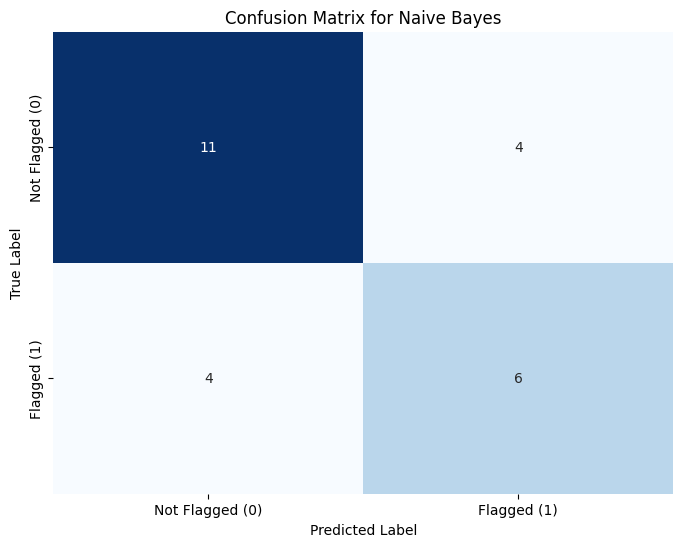

In [34]:
# --- CELL 12: Prediction and Evaluation ---
y_pred_nb = nb.predict(X_test)

print("--- Classification Report (Naive Bayes) ---")
print(classification_report(y_test, y_pred_nb))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Flagged (0)', 'Flagged (1)'],
            yticklabels=['Not Flagged (0)', 'Flagged (1)'])
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [33]:
# --- CELL 11: Model Training (Naive Bayes) ---
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()